# Intake DCAT: Data Source Examples Demo

This is a demo for using the `intake` catalog source with four different file types: CSV, GeoJSON, Shapefile, and Parquet. We have been working on using `intake` to adapt a DCAT catalog to an intake catalog, along with specifying how to load datasets. This demo serves as a reference point to understand how we can load local and remote datasets using the `intake` catalog. We hope this serves as a resource to facilitate reproducaibility of code and accessibility of various files, as well as a guide for how the `intake` catalog source works.

In [139]:
%matplotlib inline
import intake

## **YAML**
YAML files are configuration files and the most common method for creating different catalogs. They are similar to JSON files, but are better suited for configuration partially because they support comments. JSON files are better equipped for data serialization and more capable for data interchange between APIs. YAML files are also both readable and editable while JSON files are only designed to be readable.

Throughout the rest of this demo, the YAML files themselves are the main source of code changes as we work on processing different file types. We use YAML files to establish a catalog that we can then call upon to access datasets and perform our analysis. The catalog serves as a method for simplifying the analytics process by avoiding the need for boilerplate code and increasing the reproducability of our methods.

### *Important Terms and Identifiers:*
There are a few key terms that we will reference throughout this demo that need  some intial clarification. Refer back to this glossary in the case of confusion about any terminology in the documentation.

__driver__: The driver in a YAML file is the thing that does the work of reading the data for a catalog entry. For example, if I want to read the data in a DCAT catalog, I write in my YAML file: `driver: dcat`. For the data from a CSV file, I could use `driver: csv`.

__DCAT__: This is a catalog format that we can load files and data from. It has a certain specification type and includes a few extra args in the YAML file. By using DCAT to describe datasets in data catalogs, publishers increase discoverability and enable applications easily to consume metadata from multiple catalogs. 
 
__intake-dcat__: This is an intake source for DCAT catalogs. We use `intake` to load the DCAT catalogs into memory. 


## **GeoJSON Files**
### *Remote GeoJSON Files*
For the first step in our demo, we will start with the GeoJSON format. Remote GeoJSON files can be found in the DCAT catalogs for the City of Los Angeles open data portals. These datasets are specified in [catalog.yml](./catalog.yml). We can optionally give an `item` argument, which will filter the catalog to only include the selected items.

We use `intake` here to load the catalog into memory for the remote GeoJSON:

In [140]:
catalog_remote_geojson = intake.open_catalog('./catalogs/catalog.yml')
print(list(catalog_remote_geojson))

['la_open_data', 'la_geohub']


The output here includes the two sources of data we specified in our YAML file `la_open_data` and `la_geohub`. These are the two open data portals for the City of LA so depending on which datasets you are looking to analyze you can choose either data source. When referencing the catalog later on, you can reference it with regards to the specific source of data that your dataset is in.

### *Local GeoJSON*
[local_geojson.yml](./local_geojson.yml) is a YAML file that loads in our local GeoJSON files. The main change in this YAML file from the previous file is the change in `driver`. The `driver` in any YAML file serves as the direction for how to load our dataset. For a remote GeoJSON, we used `driver: dcat` as we were loading the file from a DCAT catalog. Since we are loading in local GeoJSON files from a GeoJSON catalog, we will use `driver: geojson`. In addition to the change in `driver` we also change `url` to `urlpath` and remove the `items`. This is because `url` and `items` are both specifications used only by the DCAT catalog format.

In [141]:
catalog_local_geojson = intake.open_catalog('./catalogs/local_geojson.yml') #reading in new YAML file with updated data
print(list(catalog_local_geojson))

['cultural_data']


Again, the output here is the two sources of data we included in our YAML file.

### *Reading Data from Our Catalogs:* ###

In [142]:
#Remote GeoJSON
geohub = catalog_remote_geojson.la_geohub
bike_racks = geohub['http://geohub.lacity.org/datasets/3b022cced9704108af157d3d5eedb268_2'].read()
bike_racks.head()

,OBJECTID,Status,Side,ARC_Zone,LocID,LocName,Intersect_,Address_X,City,State,...,RackColor,Status_1,Notes,Install_Da,Priority,Request,Batch,Addrees,Zip_Code,geometry
0,7001,M,L,91364,381,Acapulco,Canoga Ave,21326 Ventura Boulevard,Woodland Hills,CA,...,Black,Installed,,,,,,21326 VENTURA BLVD,91364,POINT (-118.5964108110045 34.1674938768729)
1,7002,M,L,91364,379,Liquor Store,Alhama Dr.,21052 Ventura Boulevard,Woodland Hills,CA,...,Black,Installed,,,,,,21052 VENTURA BLVD,91364,POINT (-118.5918492393963 34.16661162296765)
2,7003,M,L,91364,378,Paolis,Paralta Avenue,21020 Ventura Boulevard,Woodland Hills,CA,...,Black,Installed,,,,,,21020 VENTURA BLVD,91364,POINT (-118.5916275254887 34.16658034149554)
3,7004,M,R,91364,377,Ivy Glen,Paralta Avenue,20929 Ventura Boulevard,Woodland Hills,CA,...,Black,Installed,,,,,,20929 VENTURA BLVD,91364,POINT (-118.5892949355671 34.16669153771793)
4,7005,M,L,91367,390,Subway,Variel Ave,21032 Victory Boulevard,Woodland Hills,CA,...,Black,Installed,,,,,,21032 VICTORY BLVD,91367,POINT (-118.5916133948874 34.18818774224465)


In [143]:
#Local GeoJSON
cultural = catalog_local_geojson.cultural_data
cultural_centers = catalog_local_geojson.cultural_data.read()
cultural_centers.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,link,use_type,latitude,longitude,date_updated,email,dis_status,POINT_X,POINT_Y,geometry
0,143606638,211,None,Arts and Recreation,Cultural and Performing Arts Centers,None,www.artslb.org,Arts Council For Long Beach,350 Elm Ave,None,...,http://egis3.lacounty.gov/lms/?p=2737,publish,33.771450,-118.187417,2013-06-01T11:50:56,None,None,6.504709e+06,1.739259e+06,POINT (-118.1874168562051 33.77144990722985)
1,143607237,Current Services Locator,None,Arts and Recreation,Cultural and Performing Arts Centers,None,US Geological Survey (USGS) & LA County,Music Center,135 N. Grand Ave.,None,...,http://egis3.lacounty.gov/lms/?p=3304,publish,34.056663,-118.248351,2010-11-01T19:50:56,None,None,6.486446e+06,1.843094e+06,POINT (-118.2483515565085 34.05666332732928)
2,143616417,Current Services Locator,None,Arts and Recreation,Cultural and Performing Arts Centers,None,US Geological Survey (USGS) & LA County,Hollywood Bowl Performing Arts Complex,2301 N. Highland Ave.,None,...,http://egis3.lacounty.gov/lms/?p=13514,publish,34.111257,-118.336437,2010-11-01T19:50:56,None,None,6.459832e+06,1.863039e+06,POINT (-118.336436556227 34.1112565271323)
3,143625342,HSIP Freedom Gnis_cultural_fe,2353750,Arts and Recreation,Cultural and Performing Arts Centers,None,US Geological Survey (USGS) & LA County,Alhambra Renaissance Entertainment Center,None,None,...,http://egis3.lacounty.gov/lms/?p=24540,publish,34.096111,-118.126667,2010-11-01T19:50:56,None,None,6.523322e+06,1.857381e+06,POINT (-118.1266667565896 34.09611106726484)
4,143657176,211,None,Arts and Recreation,Cultural and Performing Arts Centers,None,www.theatreofhearts.org,Theatre Of Hearts / Youth First Artist In Resi...,672 S. La Fayette Park Pl.,None,...,http://egis3.lacounty.gov/lms/?p=56803,publish,34.060584,-118.283588,2013-06-01T11:50:56,None,None,6.475777e+06,1.844549e+06,POINT (-118.2835880558041 34.06058396671404)


## **CSVs**

### *Remote CSVs*
Used for storing tabular data, CSVs are another common file type that intake can process. To do so, CSVs also require a change in `driver` as with other file types. The driver here becomes `driver: csv`. For remote CSVs we can optionally go through the City's open database website, find our specific datasource, and copy the `downloadURL` to our YAML file. This involves a more work and since DCAT already works towards compiling information like the `downloadURLs` without us doing so ourselves, we can save time by using [catalog.yml](./catalog.yml) like we did for remote

In [144]:
catalog_remote_csv = intake.open_catalog('./catalogs/remote_csv.yml')
print(list(catalog_remote_csv))

['housing_data', 'affordable_data']


### *Local CSVs*
Using the same `driver` as remote CSVs, local CSVs can be loaded in with just a change of the `urlpath`. The `urlpath` should be the path to the directory where the CSV is stored. If the CSVs are the same folder as the YAML file ([local_csv.yml](./local_csv.yml)) you can use a shortcut to access the file via: `urlpath: '{{ CATALOG_DIR }}/your_csv.csv`.

In [145]:
catalog_local_csv = intake.open_catalog('./catalogs/local_csv.yml')
print(list(catalog_local_csv))

['la_county', 'county_fuel', 'alternative_fuel', 'la_city']


### *Reading CSV Data from our Catalogs:* ###

In [146]:
#Remote CSV:
house = catalog_remote_csv.housing_data
housing = catalog_remote_csv.housing_data.read()
housing.head()

,Site Name,Property No.,Acres,Actual Units,Occupied Units,Rate of Occupied Units,No. of Resident,Average Rent Per Month,Average Monthly Income Per Family,Location
0,Nickerson Gardens,4013,68.6,NaN,1029.0,96.5,"* 3,217",286.0,1194.0,"1590 E 114th St.\nLos Angeles, CA 90059\n(33.9..."
1,San Fernando Gardens,4022,33.5,448.0,445.0,99.3,"* 1,692",435.0,1812.0,"10995 Lehigh St.\nPacoima, CA 91331\n(34.26922..."
2,Total/Ave.,NaN,NaN,NaN,NaN,98.3,"* 21,733",362.0,1571.0,"CA\n(37.63864203100047, -120.99999889499969)"
3,Ramona Gardens,4001,32.0,498.0,493.0,99.0,"* 1,791",408.0,1812.0,"2830 Lancaster Ave.\nLos Angeles, CA 90033\n(3..."
4,Mar Vista Gardens,4021,43.2,601.0,597.0,99.3,"* 1,922",423.0,1863.0,"11965 Allin St.\nCulber City, CA 90230\n(33.99..."


In [147]:
#Local CSV:
county = catalog_local_csv.county_fuel
county_fuel = catalog_local_csv.county_fuel.read()
county_fuel.head()

,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,description,zip,link,use_type,latitude,longitude,date_updated,dis_status,POINT_X,POINT_Y
0,-118.578132,34.045767,143673799,NaN,NaN,Transportation,County Fueling Stations,NaN,DPW,DPW Topanga,...,NaN,91780,http://egis3.lacounty.gov/lms/?p=81375,publish,34.045767,-118.578132,2016-07-07T16:10:37.000Z,NaN,6.386534e+06,1.839540e+06
1,-118.248025,34.056659,143675317,NaN,NaN,Transportation,County Fueling Stations,NaN,ISD,ISD HOA (Hall of Admin),...,NaN,90012,http://egis3.lacounty.gov/lms/?p=76214,publish,34.056659,-118.248025,2018-02-28T11:49:48.000Z,NaN,6.486545e+06,1.843092e+06
2,-118.171514,34.049850,143675328,NaN,NaN,Transportation,County Fueling Stations,NaN,ISD,ISD Eastern,...,NaN,90063,http://egis3.lacounty.gov/lms/?p=76198,publish,34.049850,-118.171514,2018-03-01T15:06:49.000Z,NaN,6.509715e+06,1.840566e+06
3,-118.236858,34.060571,143675329,NaN,NaN,Transportation,County Fueling Stations,NaN,ISD,ISD Alameda,...,NaN,90012,http://egis3.lacounty.gov/lms/?p=76212,publish,34.060571,-118.236858,2018-03-01T15:08:39.000Z,NaN,6.489930e+06,1.844508e+06
4,-118.419469,33.899860,143675335,NaN,NaN,Transportation,County Fueling Stations,NaN,B & H,B &amp; H Rosecrans Maint Ct,...,NaN,90266,http://egis3.lacounty.gov/lms/?p=82549,publish,33.899860,-118.419469,2018-03-05T11:45:49.000Z,NaN,6.434377e+06,1.786203e+06


## **Shapefiles**

### *Remote Shapefiles*
Shapefiles are a useful geospatial vector data file format. To create a catalog with shapefiles, we can again write a different YAML file. Shapefiles use `driver: shapefile` which is  a plug-in that should already be installed in your environment. Once the driver is changed, the only other changes are to the `urlpath`. It is important to note here  that the shapefile driver is capable of parsing zip files to find the shapefile. There is no need to direct the path to the shapefile itself as the driver can take care of it. This can be seen in [remote_shp.yml](./remote_shp.yml) in which the urlpath goes to the zip file that contains the shapefile I'm looking for.

In [148]:
catalog_remote_shp = intake.open_catalog('./catalogs/remote_shp.yml') #reading in new YAML file with updated data
print(list(catalog_remote_shp))

['build_permit_data']


### *Local Shapefiles*
Similar to remote Shapefiles, for local shapefiles, the driver must be `shapefile` and you can direct the urlpath to a zip file. An important exception to note is an issue wtihin the fiona library (which handles the reading of geospatial data). The issue is that while remote zipfiles are able to be parsed by the shapefile driver, for some reason local zipfiles aren't as easily deciphered. To prevent errors from arising, it is necessary to include `zip://` in the urlpath for the local zipfiles.

In [149]:
catalog_local_shp = intake.open_catalog('./catalogs/local_shp.yml') #reading in new YAML file with updated data
print(list(catalog_local_shp))

['la_city', 'la_county', 'county_stations', 'alternative_fuel']


### *Reading SHP Data from our Catalogs:* ###

In [150]:
#Remote SHP:
permit = catalog_remote_shp.build_permit_data
build_permits = catalog_remote_shp.build_permit_data.read()
build_permits.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,zip,link,use_type,latitude,longitude,date_updat,dis_status,POINT_X,POINT_Y,geometry
0,144690610,None,None,Transportation,County Fueling Stations,None,DPW,DPW Topanga,3800 S. Topanga Cyn Blvd.,None,...,91780,http://egis3.lacounty.gov/lms/?p=81375,publish,34.045767,-118.578132,2016-07-07T16:10:37.000Z,None,6.386534e+06,1.839540e+06,POINT (-118.5781323561294 34.04576726675207)
1,144692117,None,None,Transportation,County Fueling Stations,None,ISD,ISD HOA (Hall of Admin),140 N. Grand Ave,None,...,90012,http://egis3.lacounty.gov/lms/?p=76214,publish,34.056659,-118.248025,2018-02-28T11:49:48.000Z,None,6.486545e+06,1.843092e+06,POINT (-118.2480252069915 34.0566587546944)
2,144692128,None,None,Transportation,County Fueling Stations,None,ISD,ISD Eastern,1104 N. Eastern Ave,None,...,90063,http://egis3.lacounty.gov/lms/?p=76198,publish,34.049850,-118.171514,2018-03-01T15:06:49.000Z,None,6.509715e+06,1.840566e+06,POINT (-118.1715139158679 34.04985002424156)
3,144692129,None,None,Transportation,County Fueling Stations,None,ISD,ISD Alameda,1055 North Alameda,None,...,90012,http://egis3.lacounty.gov/lms/?p=76212,publish,34.060571,-118.236858,2018-03-01T15:08:39.000Z,None,6.489930e+06,1.844508e+06,POINT (-118.2368580961275 34.06057139376922)
4,144692135,None,None,Transportation,County Fueling Stations,None,B & H,B &amp; H Rosecrans Maint Ct,3621 The Strand,None,...,90266,http://egis3.lacounty.gov/lms/?p=82549,publish,33.899860,-118.419469,2018-03-05T11:45:49.000Z,None,6.434377e+06,1.786203e+06,POINT (-118.4194689558334 33.89985956730876)


In [151]:
#Local SHP:
fuel = catalog_local_shp.county_stations
county_stations = catalog_local_shp.county_stations.read()
county_stations.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,zip,link,use_type,latitude,longitude,date_updat,dis_status,POINT_X,POINT_Y,geometry
0,143673799,None,None,Transportation,County Fueling Stations,None,DPW,DPW Topanga,3800 S. Topanga Cyn Blvd.,None,...,91780,http://egis3.lacounty.gov/lms/?p=81375,publish,34.045767,-118.578132,2016-07-07T16:10:37.000Z,None,6.386534e+06,1.839540e+06,POINT (-118.5781323561294 34.04576726675207)
1,143675317,None,None,Transportation,County Fueling Stations,None,ISD,ISD HOA (Hall of Admin),140 N. Grand Ave,None,...,90012,http://egis3.lacounty.gov/lms/?p=76214,publish,34.056659,-118.248025,2018-02-28T11:49:48.000Z,None,6.486545e+06,1.843092e+06,POINT (-118.2480252069915 34.0566587546944)
2,143675328,None,None,Transportation,County Fueling Stations,None,ISD,ISD Eastern,1104 N. Eastern Ave,None,...,90063,http://egis3.lacounty.gov/lms/?p=76198,publish,34.049850,-118.171514,2018-03-01T15:06:49.000Z,None,6.509715e+06,1.840566e+06,POINT (-118.1715139158679 34.04985002424156)
3,143675329,None,None,Transportation,County Fueling Stations,None,ISD,ISD Alameda,1055 North Alameda,None,...,90012,http://egis3.lacounty.gov/lms/?p=76212,publish,34.060571,-118.236858,2018-03-01T15:08:39.000Z,None,6.489930e+06,1.844508e+06,POINT (-118.2368580961275 34.06057139376922)
4,143675335,None,None,Transportation,County Fueling Stations,None,B & H,B &amp; H Rosecrans Maint Ct,3621 The Strand,None,...,90266,http://egis3.lacounty.gov/lms/?p=82549,publish,33.899860,-118.419469,2018-03-05T11:45:49.000Z,None,6.434377e+06,1.786203e+06,POINT (-118.4194689558334 33.89985956730876)


## **Parquet Files**
Parquet files are an alternative to CSVs. They are more condensed, easier to load, and provide data types for entries. Since they are similar to CSVs, they can be created by converting CSV using pandas. It isn't particularly easy to find open and available Parquet files so we will opt for converting CSV files. Again, as with all other file types, the main changes necesary to create a catalog with Parquet files is changing the driver type. There is a plug-in available for Parquet files that allows you to set `driver: parquet`. Use `conda install -c conda-forge intake-parquet` to install the plug-in. Afterwards, we can then change our driver type and change the urlpath to access to the parquet files.

In [152]:
catalog_parquet = intake.open_catalog('./catalogs/parquet.yml') #reading in new YAML file with updated data
print(list(catalog_parquet))

['la_county', 'county_fuel', 'alternative_fuel', 'la_city']


### *Reading Data from our Catalog:* ###

In [153]:
#local Parquet:
frame1 = catalog_parquet.la_county
county = catalog_parquet.la_county.read()
county

,CITY,CITY_ID,CITY_TYPE,CITY_NAME,CITY_LABEL,COLOR_CODE,ABBR,CITY_NO,DESCRIPTN,URL,PHONE,OF_AREA_SM,FEAT_TYPE,COMMENT,SUB_TYPE,COLOR,OBJECTID
0,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,,0,1,1
1,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,,0,1,2
2,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,,0,1,3
3,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,,0,1,4
4,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,,0,1,5
5,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,,0,1,6
6,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,,0,1,7


## **SQL Database**

SQL is the standard language for dealing with Relational Databases. Datasets can be stored in SQL databases. Pandas is able to convert a CSV dataset to a SQLite database. For dealing with SQL databases, the change again comes predominantly in the YAML file. The driver should be: `driver: sql_cat` and instead of `urlpath:` we will use `uri:`. For our uri when using a SQLite database, the path should include `sqlite:///file_name`.

In [154]:
catalog_sqlite = intake.open_catalog('./catalogs/sqlite2.yml') #reading in new YAML file with updated data
print(list(catalog_sqlite))

['chinook']


### *Reading Data from our Catalog:* ###

Within this new catalog, we have an arg called 'chinook'. The arg here is tricky because it is actually in and of itself another catalog that has it's own tables. In the next step we demonstrate how this chinook catalog actually holds different data that we can then read and process.

In [155]:
list(catalog_sqlite.chinook)

['albums',
 'artists',
 'customers',
 'employees',
 'genres',
 'invoice_items',
 'invoices',
 'tracks',
 'media_types',
 'playlist_track',
 'playlists']

There are lots of tables such as 'albums', 'artists', etc. hidden within our chinook catalog. We run into an error if we try to read directly the chinook catalog without specifying a table that we are hoping to parse and analyze. In the next step, we read the data in the chinook catalog regarding artists.

In [156]:
artists = catalog_sqlite.chinook.artists.read()
artists.head()

,Name
ArtistId,
1,AC/DC
2,Accept
3,Aerosmith
4,Alanis Morissette
5,Alice In Chains


Overall, the heavy lifting with intake was done when we loaded in the different YAML files to process our desired file types and create catalogs. After establishing new catalogs, the analysis process is fairly consistent and standardized regardless of which file type we use. Calling upon catalogs allows us to directly read datasets into memory in a simplified manner and conduct whatever analysis we have in mind. 

Having already created dataframes from our catalogs, we can now continue to the analysis process.

# Conducting Our Analysis:

With our dataframes, the process of evaluating and analyzing our findings varies depending on what you are looking to find and what the larger research question is. Looking to answer whatever the central question might be is an easier process now because we used the intake catalog source to process what could otherwise be tedious or complex sources of data. Instead of spending time adding in boilerplate code and searching for the various files we want to load in, we can simiplify our process by incorporating intake into our methodology.

As a start, one way to uncover useful exploratory insights from our data is to plot our points. To demonstrate this, I will plot the local shapefile datasets we used previously.

As a first step, I will read into memory the three other local shapefile datasets. In the steps above I read in one of the datasets into memory, but my analysis uses more data so I will create three more dataframes with the necessary data.

In [157]:
#Locations of Alternative Fueling Stations
hybrid = catalog_local_shp.alternative_fuel
alternatives = catalog_local_shp.alternative_fuel.read()
alternatives.head()

,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,addrln1,addrln2,...,zip,link,use_type,latitude,longitude,date_updat,dis_status,POINT_X,POINT_Y,geometry
0,143607782,HSIP Freedom Alternative_Fueling_Stations,None,Transportation,Alternative Fuel,BioDiesel Fueling Stations,National Transportation Atlas Database (NTAD) ...,Conserv Fuel,11699 San Vicente Boulevard,None,...,90049,http://egis3.lacounty.gov/lms/?p=4641,publish,34.053711,-118.465431,2010-11-01T19:50:56.000Z,None,6.420689e+06,1.842253e+06,POINT (-118.465431055888 34.0537109664858)
1,143607783,HSIP Freedom Alternative_Fueling_Stations,None,Transportation,Alternative Fuel,BioDiesel Fueling Stations,National Transportation Atlas Database (NTAD) ...,Spirit Truck Stop - Itl Incorporated (Cudahy F...,8330 Atlantic Avenue,None,...,90201,http://egis3.lacounty.gov/lms/?p=4642,publish,33.958214,-118.184720,2010-11-01T19:50:56.000Z,None,6.505654e+06,1.807225e+06,POINT (-118.1847200558739 33.95821396725798)
2,143607784,HSIP Freedom Alternative_Fueling_Stations,None,Transportation,Alternative Fuel,BioDiesel Fueling Stations,National Transportation Atlas Database (NTAD) ...,Usa Gasoline,4395 Glencoe Avenue,None,...,90292,http://egis3.lacounty.gov/lms/?p=4643,publish,33.984869,-118.431689,2010-11-01T19:50:56.000Z,None,6.430802e+06,1.817155e+06,POINT (-118.4316890557334 33.98486896691227)
3,143607785,HSIP Freedom Alternative_Fueling_Stations,None,Transportation,Alternative Fuel,BioDiesel Fueling Stations,National Transportation Atlas Database (NTAD) ...,Palisades Gas & Wash,890 Alma Real Road,None,...,90272,http://egis3.lacounty.gov/lms/?p=4644,publish,34.045365,-118.524788,2010-11-01T19:50:56.000Z,None,6.402693e+06,1.839305e+06,POINT (-118.5247880560931 34.04536496703356)
4,143607786,HSIP Freedom Alternative_Fueling_Stations,None,Transportation,Alternative Fuel,BioDiesel Fueling Stations,National Transportation Atlas Database (NTAD) ...,La Biofuel,1217 Wilshire Boulevard,None,...,90408,http://egis3.lacounty.gov/lms/?p=4645,publish,34.025502,-118.490428,2010-11-01T19:50:56.000Z,None,6.413067e+06,1.832024e+06,POINT (-118.4904280558922 34.02550196676635)


In [158]:
#LA County Boundary
county = catalog_local_shp.la_county
county_boundary = catalog_local_shp.la_county.read()
county_boundary.head()

,CITY,CITY_ID,CITY_TYPE,CITY_NAME,CITY_LABEL,COLOR_CODE,ABBR,CITY_NO,DESCRIPTN,URL,PHONE,OF_AREA_SM,FEAT_TYPE,COMMENT,SUB_TYPE,COLOR,OBJECTID,geometry
0,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,None,0,1,1,POLYGON ((-118.4149154297449 32.79622269790656...
1,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,None,0,1,2,"POLYGON ((-118.422688617678 32.79825704501661,..."
2,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,None,0,1,3,POLYGON ((-118.6016879632406 33.02616703712411...
3,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,None,0,1,4,(POLYGON ((-117.7387369108348 34.8232565427645...
4,250,31,Unincorporated,Unincorporated,Unincorporated,1,UNIN,0,UNINC,www.lacounty.gov,2139744321,0,Land,None,0,1,5,POLYGON ((-118.5763756616756 33.02901292392475...


In [159]:
#LA City Boundary
city = catalog_local_shp.la_city
city_boundary = catalog_local_shp.la_city.read()
city_boundary.head()

,OBJECTID,CITY,geometry
0,1,IN,POLYGON ((-118.4199975215926 34.32916905952637...


Next, I will take these dataframes and plot them using matplotlib.

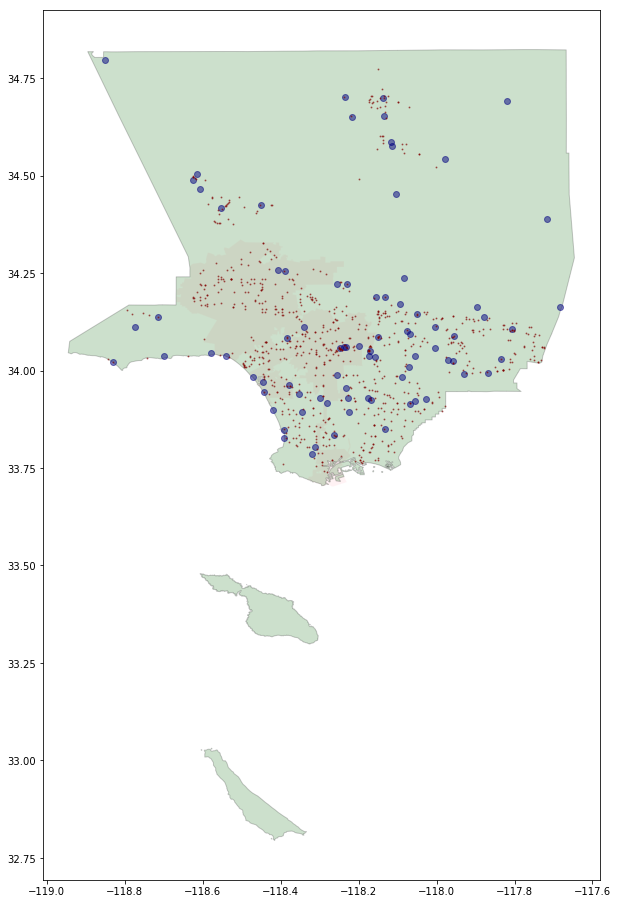

In [160]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(16,16))
city_boundary.plot(ax=ax, color='pink', alpha=0.2, linewidth=1, edgecolor='white')
county_boundary.plot(ax=ax, color='darkgreen', alpha=0.2, linewidth=1, edgecolor='black')
county_stations.plot(ax=ax, color='navy', alpha=0.5, linewidth=1)
alternatives.plot(ax=ax, color='maroon', alpha=0.5, markersize=1)

With this map, I can continue conducting standard analysis and looking to uncover possible correlative relationships.